In [1]:
%cd C:\Users\86198\hw_wp

C:\Users\86198\hw_wp


In [2]:
%run EddyDetection.ipynb
%run utils.ipynb

In [3]:
%cd D:\eddy\eddy\data\ssh_data

D:\eddy\eddy\data\ssh_data


In [16]:

g = RegularGridDataset(
    r'nrt_global_allsat_phy_l4_20191201_20200320.nc',
    "longitude",
    "latitude",
)

g.grid('adt')
adt = g.vars['adt'].T
lon = g.vars['longitude']
lat = g.vars['latitude']

import os
import os.path as osp
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

import xarray
import json

We assume pixel position of grid is centered for nrt_global_allsat_phy_l4_20191201_20200320.nc


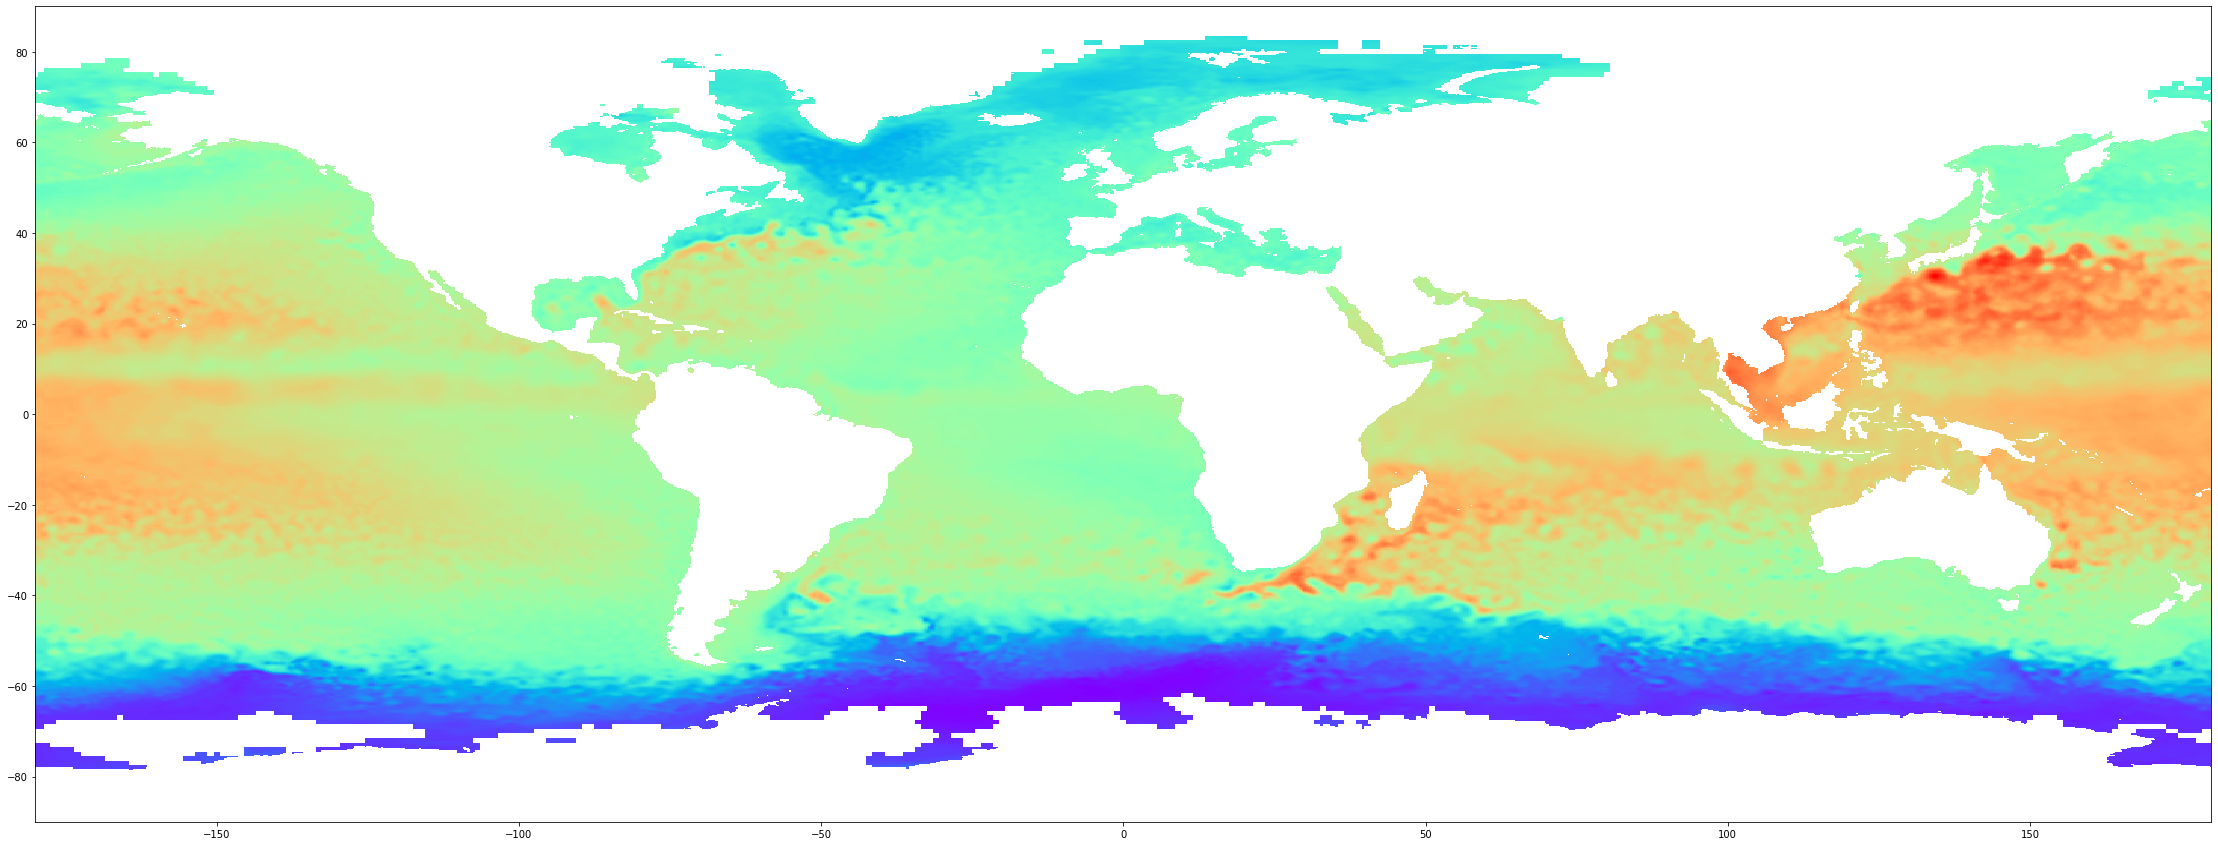

In [17]:
fig, ax = plt.subplots(figsize=(39,15))
plt.pcolormesh(lon, lat, adt, cmap='rainbow')
plt.show()

In [5]:
# roi_lon1 = 105
# roi_lon2 = 125
# roi_lat1 = 5
# roi_lat2 = 25

# roi_lon1 = 40
# roi_lon2 = 70
# roi_lat1 = 10
# roi_lat2 = 30

roi_lon1 = 140
roi_lon2 = 180
roi_lat1 = 30
roi_lat2 = 50

In [5]:
dt = xarray.DataArray(adt, dims=('lat', 'lon'), coords=dict(lon=lon, lat=lat))
roi_adt = select(dt, roi_lon1, roi_lon2, roi_lat1, roi_lat2)
ori_roi_adt = roi_adt.copy()

roi_adt = interp(roi_adt, 0.125)

# roi_adt = grid(adt, lon, lat, roi_lon1, roi_lon2, roi_lat1, roi_lat2, 0.125)

done


In [6]:
roi_lon = roi_adt.lon
roi_lat = roi_adt.lat
roi_adt = roi_adt.values




In [7]:
write(roi_adt, r'test2.nc', roi_lon, roi_lat)
g = RegularGridDataset(
    r'test2.nc',
    "longitude",
    "latitude",
)

We assume pixel position of grid is centered for test2.nc


closed


In [8]:
g.nan_mask = True
g.add_uv("adt", "ugos", "vgos") #Fix me
g.copy("adt", "adt_raw")


In [9]:
roi_U = g.vars['ugos'].T
roi_V = g.vars['vgos'].T
lon = g.vars['longitude']
lat = g.vars['latitude']
roi_lon, roi_lat = np.meshgrid(lon, lat)
roi_adt = g.vars['adt_raw'].T

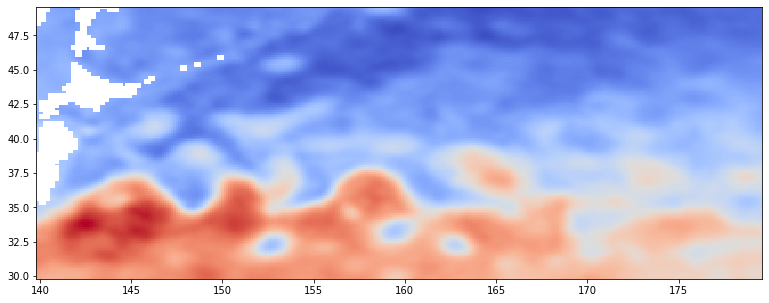

In [10]:
plt.figure(figsize=(13, 5))
plt.pcolormesh(roi_lon, roi_lat, roi_adt, cmap='coolwarm')
plt.show()

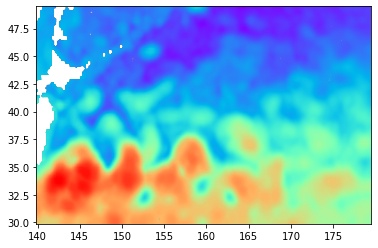

In [11]:
res_a, res_c = detect(roi_adt, roi_lon, roi_lat, roi_U, roi_V, a=3, b=2, levels=None)

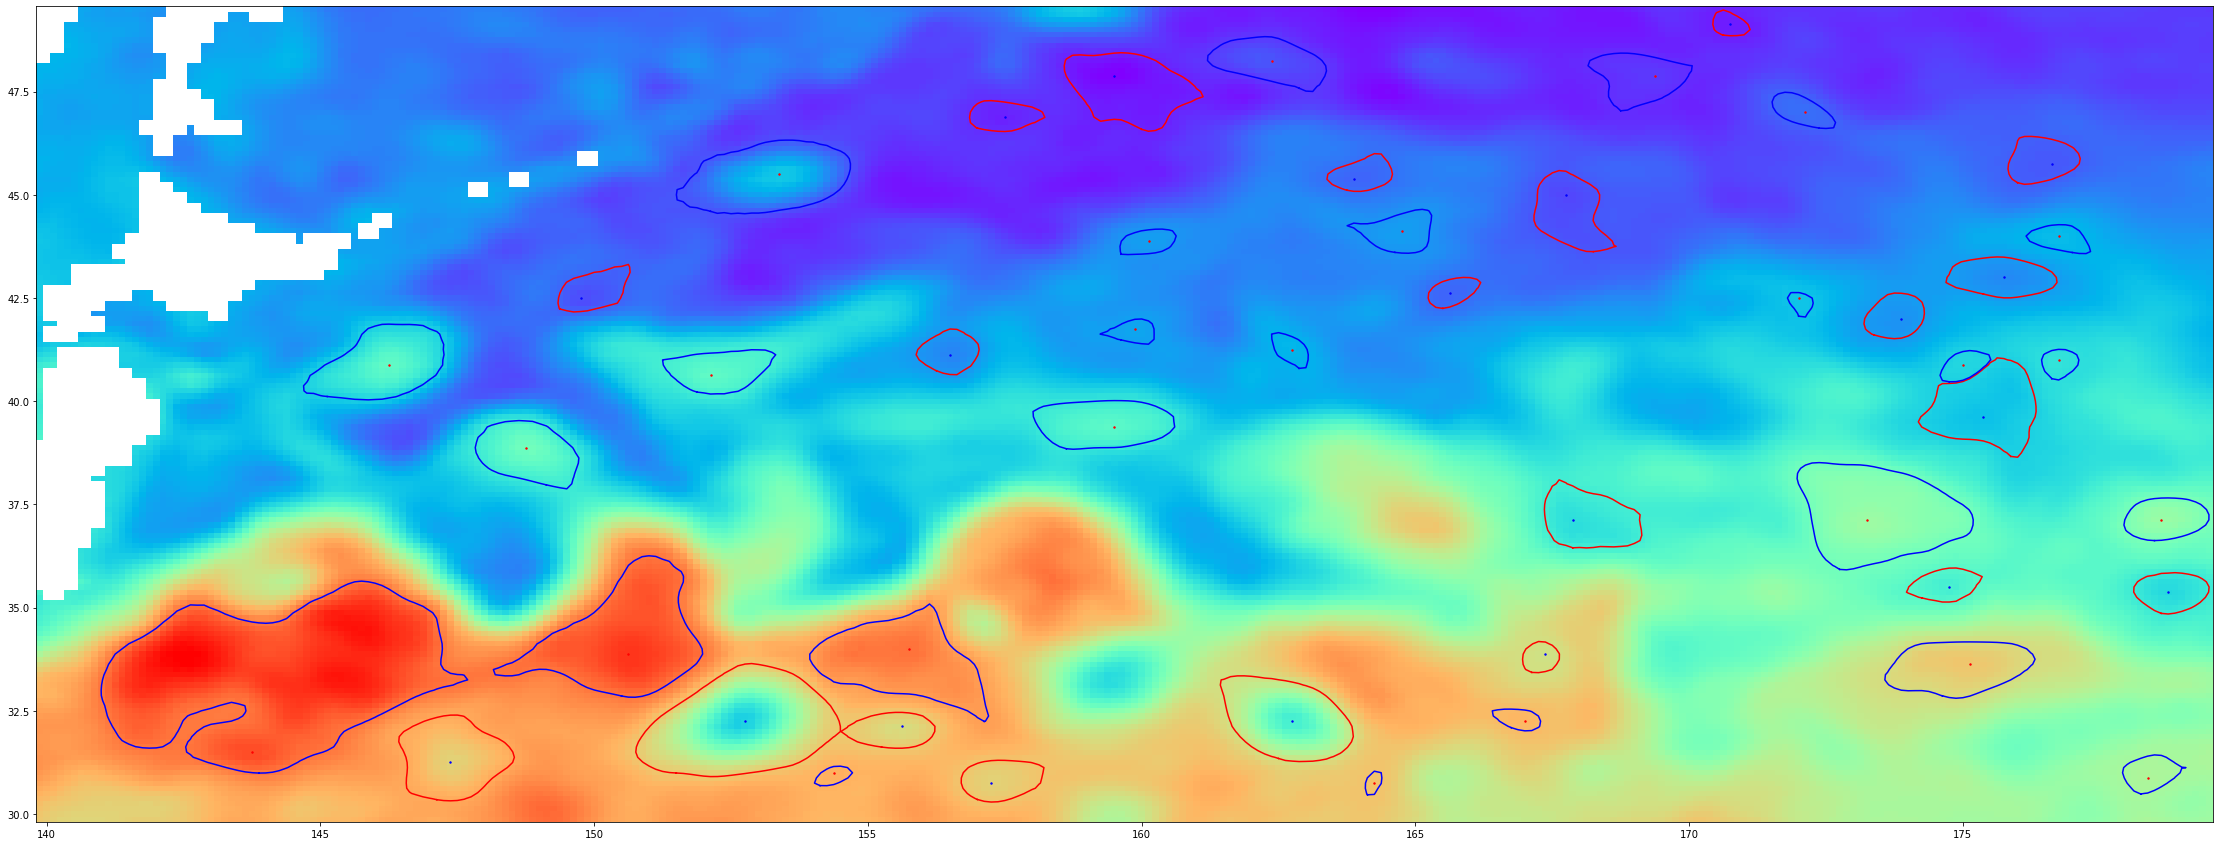

In [14]:
fig, ax = plt.subplots(figsize=(39,15))
ax.pcolormesh(roi_lon, roi_lat, roi_adt, cmap='rainbow')
for eddy in res_a:
    center = eddy['center']
    contour = eddy['contour']
    ax.scatter(center[0], center[1], color='blue', s=2)
    ax.plot(contour[:,0], contour[:,1], color='red')
    
for eddy in res_c:
    center = eddy['center']
    contour = eddy['contour']
    ax.scatter(center[0], center[1], color='red', s=2)
    ax.plot(contour[:,0], contour[:,1], color='blue')
    
plt.show()

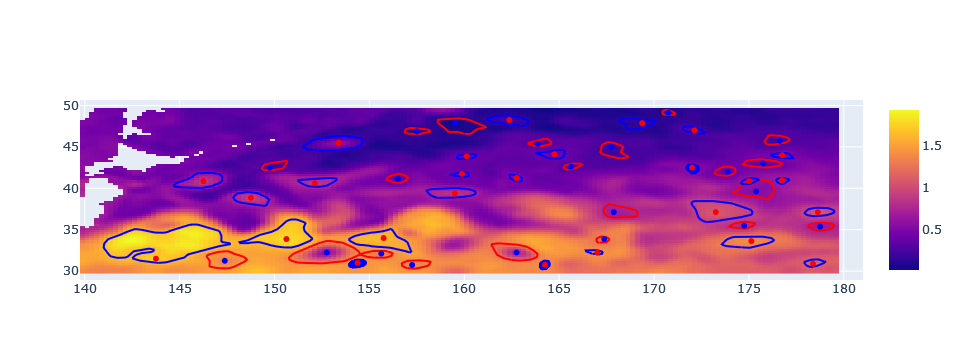

In [12]:
dt = ori_roi_adt
mappable = go.Heatmap(x=dt.lon, y=dt.lat, z=dt, autocolorscale=True, zmin=np.nanmin(dt), zmax=np.nanmax(dt))
fig = go.Figure(mappable)
for eddy in res_a:
    center = eddy['center']
    contour = eddy['contour']
    fig.add_trace(go.Scatter(x=contour[:,0], y=contour[:,1], 
                             line_color='red', hoverinfo = 'text+x+y', text = f'center:{center}', showlegend=False))
    fig.add_trace(go.Scatter(x=[center[0]], y=[center[1]], 
                             mode="markers", marker_color='blue', hoverinfo='x+y', showlegend=False))
    
for eddy in res_c:
    center = eddy['center']
    contour = eddy['contour']
    fig.add_trace(go.Scatter(x=contour[:,0], y=contour[:,1], 
                             line_color='blue', hoverinfo = 'text+x+y', text = f'center:{center}', showlegend=False))
    fig.add_trace(go.Scatter(x=[center[0]], y=[center[1]], 
                             mode="markers", marker_color='red', hoverinfo='x+y', showlegend=False))
    
fig.show()

In [13]:
# fig, ax = plt.subplots(figsize=(39,15))
# ax.pcolormesh(roi_lon, roi_lat, roi_adt, cmap='rainbow')
# res.display(ax)

In [11]:
# roi_lon0 = 140
# roi_lon1 = 180
# roi_lat0 = 30
# roi_lat1 = 40

# roi_x = ((roi_lon0 < lon ) & (lon < roi_lon1)).nonzero()
# roi_y = ((roi_lat0 < lat ) & (lat < roi_lat1)).nonzero()
# roi_x, roi_y = np.meshgrid(roi_x, roi_y)
# roi_lon, roi_lat = lon[roi_x], lat[roi_y]
# roi_adt = adt[roi_x, roi_y]

# roi_U = U[roi_x, roi_y]
# roi_V = V[roi_x, roi_y]

# roi_U = U
# roi_V = V
# roi_lon = lon
# roi_lat = lat
# roi_adt = adt.T